Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

CSV de poblacion y demanda/meteorología

In [2]:
poblacion = pd.read_csv('Cities_unified.csv')
poblacion

,Codigos,Provincias,Latitud,Longitud,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,Araba/Álava,42.835126,-2.720603,321932,323648,324126,326574,328868,331549,333940,333626,334412,336308
1,2,Albacete,38.825409,-1.980373,396987,394580,392118,390032,388786,388167,388270,386464,385727,387529
2,3,Alicante/Alacant,38.478638,-0.568699,1868438,1855047,1836459,1825332,1838819,1858683,1879888,1881762,1901594,1955268
3,4,Almería,37.196085,-2.344813,701688,701211,704297,706672,709340,716820,727945,731792,740534,753364
4,5,Ávila,40.571037,-4.945535,167015,164925,162514,160700,158498,157640,157664,158421,158140,159764
5,6,Badajoz,38.709771,-6.141585,690929,686730,684113,679884,676376,673559,672137,669943,666971,666049
6,7,"Balears, Illes",39.575189,2.912292,1103442,1104479,1107220,1115999,1128908,1149460,1171543,1173008,1176659,1209906
7,8,Barcelona,41.731001,1.984054,5523784,5523922,5542680,5576037,5609350,5664579,5743402,5714730,5727615,5797356
8,9,Burgos,42.368713,-3.585742,366900,364002,360995,358171,357070,356958,357650,356055,355045,357370
9,10,Cáceres,39.711890,-6.160822,408703,406267,403665,400036,396487,394151,391850,389558,387805,388257


In [3]:
demanda = pd.read_csv('demanda_meteo.csv')
demanda['Datetime'] = pd.to_datetime(demanda['Datetime'])
demanda

,Datetime,Demanda Real,Demanda Prevista,Demanda Programada,Demanda D+1,Precio,temperature_2m_1,direct_normal_irradiance_instant_1,wind_speed_100m_1,temperature_2m_2,...,wind_speed_100m_50,temperature_2m_51,direct_normal_irradiance_instant_51,wind_speed_100m_51,temperature_2m_52,direct_normal_irradiance_instant_52,wind_speed_100m_52,temperature_2m_0,direct_normal_irradiance_instant_0,wind_speed_100m_0
0,2014-01-01 00:00:00,24301.66667,23878.33333,24099.00,0.0,37.21,7.4985,0.0,16.099690,7.874,...,30.758411,11.714001,0.0,17.339897,10.032000,0.0,11.659777,5.791485,0.0,18.565381
1,2014-01-01 01:00:00,23365.33333,23322.00000,22269.00,0.0,30.57,7.0485,0.0,17.388409,7.724,...,30.312773,11.614000,0.0,18.000000,9.731999,0.0,10.661107,5.709594,0.0,18.443398
2,2014-01-01 02:00:00,21672.50000,21711.16667,21136.00,0.0,26.30,7.3985,0.0,19.319628,7.574,...,27.792374,11.564000,0.0,17.651016,9.932000,0.0,11.212135,5.620734,0.0,18.401250
3,2014-01-01 03:00:00,20192.00000,20230.33333,19911.00,0.0,26.18,7.3485,0.0,20.140705,7.424,...,25.772078,11.464001,0.0,18.430452,10.432000,0.0,12.620554,5.597380,0.0,18.198554
4,2014-01-01 04:00:00,19220.66667,19215.33333,19060.00,0.0,22.40,7.4985,0.0,21.995380,7.374,...,23.732710,11.464001,0.0,18.161278,10.582000,0.0,14.058450,5.656951,0.0,18.100382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2023-12-31 19:00:00,29135.66667,29131.16667,28913.00,29409.5,109.07,6.0145,0.0,10.137692,8.626,...,19.039200,15.323999,0.0,14.154915,15.515000,0.0,25.050413,8.350744,0.0,16.116332
87644,2023-12-31 20:00:00,28703.50000,28538.83333,28504.00,28925.0,101.69,6.1145,0.0,2.741678,8.376,...,16.516901,15.374000,0.0,10.495713,15.515000,0.0,23.623243,8.087325,0.0,14.814726
87645,2023-12-31 21:00:00,27423.16667,26992.16667,27230.50,27363.5,92.69,4.1145,0.0,5.411986,8.326,...,13.556282,14.974000,0.0,8.557102,15.515000,0.0,23.623243,7.461672,0.0,13.838921
87646,2023-12-31 22:00:00,24613.91667,24138.58333,24354.00,24467.5,86.82,4.9145,0.0,6.130579,8.126,...,13.708391,14.974000,0.0,5.959060,15.665000,0.0,22.751316,7.525395,0.0,12.934626


In [4]:
festivos = pd.read_csv('Festivos.csv')
festivos

,Day,Day of the week,"Coruña, A",Albacete,Alicante/Alacant,Almería,Araba/Álava,Asturias,Badajoz,Barcelona,...,Soria,Tarragona,Teruel,Toledo,Valencia/València,Valladolid,Zamora,Zaragoza,Ávila,sumafest
0,2014-01-01,X,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1.000000
1,2014-01-02,J,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.019659
2,2014-01-03,V,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,2014-01-04,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,2014-01-05,D,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,X,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3648,2023-12-28,J,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3649,2023-12-29,V,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3650,2023-12-30,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


Gráfico de evolución temporal de la demanda

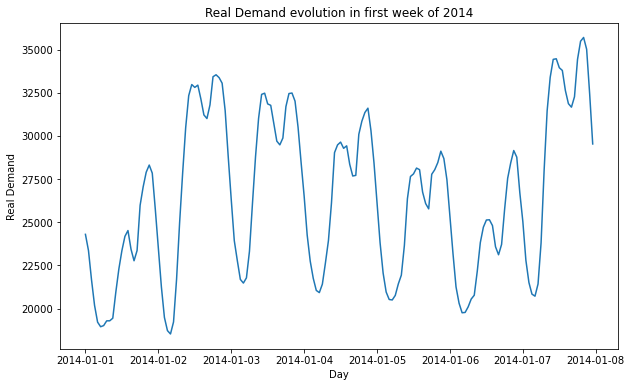

In [5]:
plt.figure(figsize=(10,6))
plt.plot(demanda['Datetime'][:24*7], demanda ['Demanda Real'][:24*7])
plt.title ('Real Demand evolution in first week of 2014')
plt.xlabel('Day')
plt.ylabel('Real Demand')
plt.show()

In [6]:
### Grafico de los precios

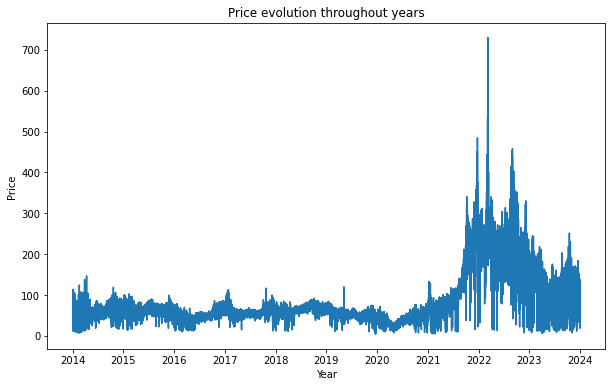

In [7]:
plt.figure(figsize=(10,6))
plt.plot(demanda['Datetime'], demanda ['Precio'])
plt.title ('Price evolution throughout years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Promedios diarios y mensuales

In [8]:
def promedio_interval (array,intervalo):
    n = len(array)
    nintervalos = int (n/intervalo)
    prom = []
    for i in range (nintervalos):
        prom.append(np.mean(array[i*intervalo:(i+1)*intervalo]))
    if n%intervalo != 0: 
        prom.append (np.mean(array[i*nintervalos:]))
    return prom

In [9]:
prom_diario = promedio_interval (demanda ['Demanda Real'], 24)
prom_semanal = promedio_interval (demanda ['Demanda Real'], 24*7)
prom_mensual = promedio_interval (demanda ['Demanda Real'], 24*30)

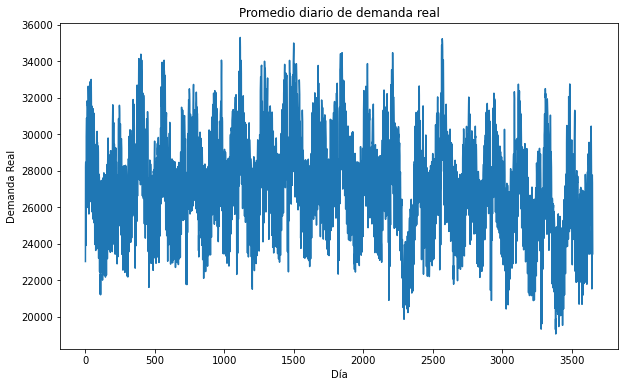

In [10]:
plt.figure(figsize=(10,6))
plt.plot (prom_diario)
plt.title ('Promedio diario de demanda real')
plt.xlabel ('Día')
plt.ylabel ('Demanda Real')
plt.show()

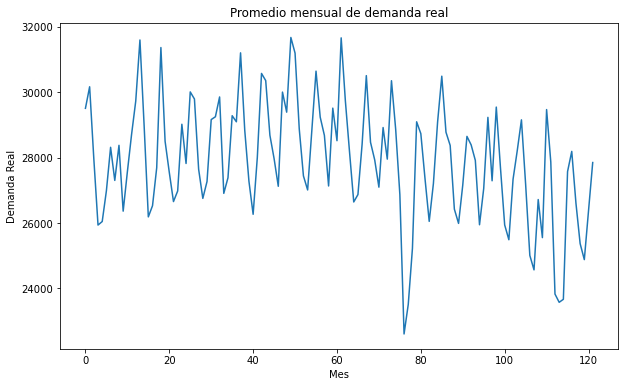

In [11]:
plt.figure(figsize=(10,6))
plt.plot (prom_mensual)
plt.title ('Promedio mensual de demanda real')
plt.xlabel ('Mes')
plt.ylabel ('Demanda Real')
plt.show()

Con medias móviles

In [12]:
def promedio_window (array, window):
    n = len(array)
    prom = []
    for i in range (len(array)):
        prom.append(np.mean(array[max(0,i-window):min(len(array), i+window)]))
#     if n%intervalo != 0: 
#         prom.append (np.mean(array[i*nintervalos:]))
    return prom

In [13]:
window_diario = promedio_window (demanda ['Demanda Real'], 12)
window_semanal = promedio_window (demanda ['Demanda Real'], 24*3)
window_mensual = promedio_window (demanda ['Demanda Real'], 24*15)
window_6mensual = promedio_window (demanda ['Demanda Real'], 24*15*12)

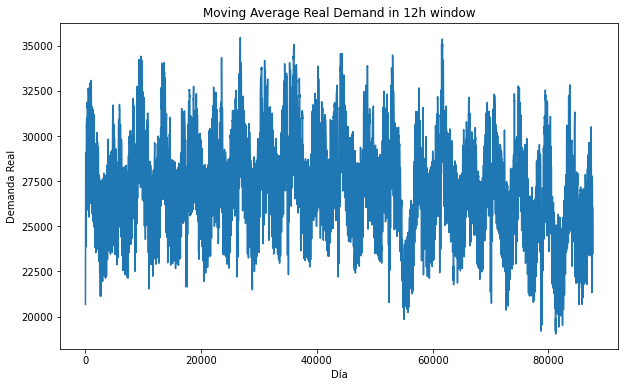

In [14]:
plt.figure(figsize=(10,6))
plt.plot (window_diario)
plt.title ('Moving Average Real Demand in 12h window')
plt.xlabel ('Día')
plt.ylabel ('Demanda Real')
plt.show()

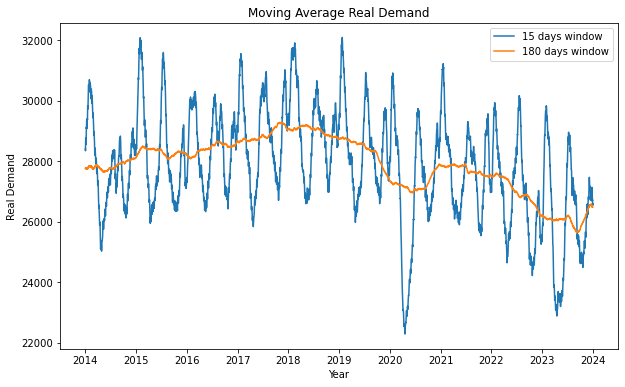

In [15]:
plt.figure(figsize=(10,6))
plt.plot (demanda['Datetime'],window_mensual, label='15 days window')
plt.plot (demanda['Datetime'],window_6mensual, label='180 days window')
plt.legend()
plt.title ('Moving Average Real Demand')
plt.ylabel ('Real Demand')
plt.xlabel('Year')
plt.show()

Demanda en función de la hora del día

In [16]:
def prom_hours (array):
    hour = []
    for i in range(24):
        hour.append([])
    cont = 0
    for i in range (len(array)):
        hour[cont].append(array[i])
        cont += 1
        if cont == 24:
            cont = 0
    prom = [np.mean(v) for v in hour]
    return prom

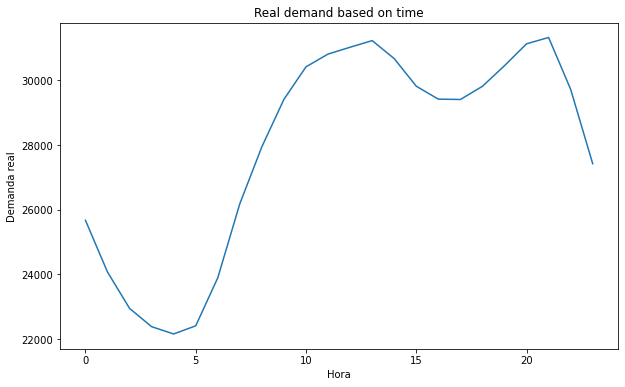

In [17]:
hourly_demand = prom_hours (demanda ['Demanda Real'])
plt.figure(figsize=(10,6))
plt.title ('Real demand based on time')
plt.xlabel ('Hora')
plt.ylabel('Demanda real')
plt.plot (hourly_demand)
plt.show()

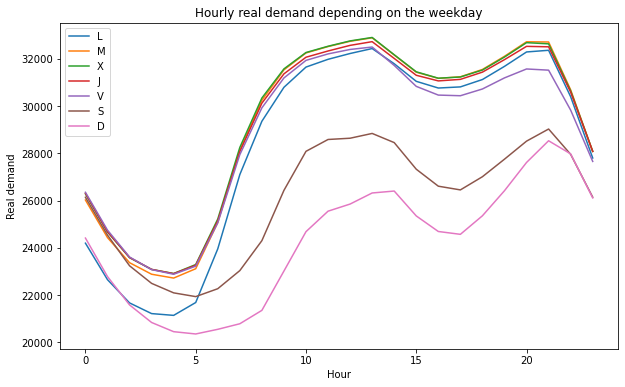

In [18]:
dias = ['L', 'M', 'X', 'J', 'V', 'S', 'D']

prom_weekdays = []

plt.figure(figsize=(10,6))

for i, day in enumerate (dias):
    filtered_data = demanda.loc[demanda['Datetime'].dt.weekday == i]
    aux = prom_hours(list(filtered_data['Demanda Real']))
    prom_weekdays.append(aux)
    plt.plot(prom_weekdays[i], label = day)
    
plt.title ('Hourly real demand depending on the weekday')
plt.xlabel ('Hour')
plt.ylabel('Real demand')
plt.legend(loc='upper left')
plt.show()  

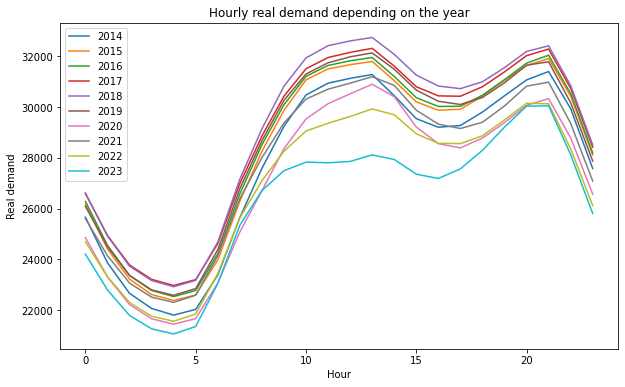

In [19]:
prom_anual = []
plt.figure(figsize=(10,6))
for year in range (2014,2024):
    filtered_data = demanda.loc[demanda['Datetime'].dt.year == year]
    aux = prom_hours(list(filtered_data['Demanda Real']))
    prom_anual.append(aux)
    plt.plot(aux, label = year)
    
plt.title ('Hourly real demand depending on the year')
plt.xlabel ('Hour')
plt.ylabel('Real demand')
plt.legend(loc='upper left')
plt.show()  

Boxplots

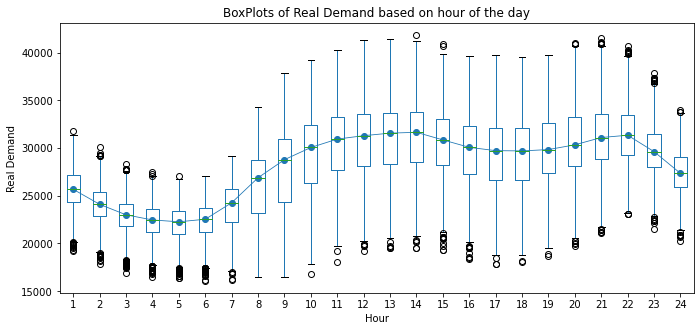

<Figure size 720x432 with 0 Axes>

In [20]:
fig, ax = plt.subplots(figsize=(11, 5))
plt.figure(figsize=(10,6))
demanda['hora_dia'] = demanda['Datetime'].dt.hour + 1
demanda.boxplot(column='Demanda Real', by='hora_dia', ax=ax)
demanda.groupby('hora_dia')['Demanda Real'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Real Demand')
ax.set_xlabel('Hour')
ax.set_title('BoxPlots of Real Demand based on hour of the day')
fig.suptitle('');

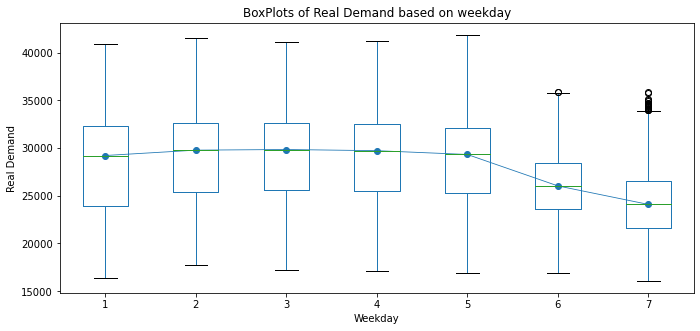

In [21]:
fig, ax = plt.subplots(figsize=(11, 5))
demanda['Día'] = demanda['Datetime'].dt.weekday + 1
demanda.boxplot(column='Demanda Real', by='Día', ax=ax,)
demanda.groupby('Día')['Demanda Real'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Real Demand')
ax.set_xlabel('Weekday')
ax.set_title('BoxPlots of Real Demand based on weekday')
fig.suptitle('');

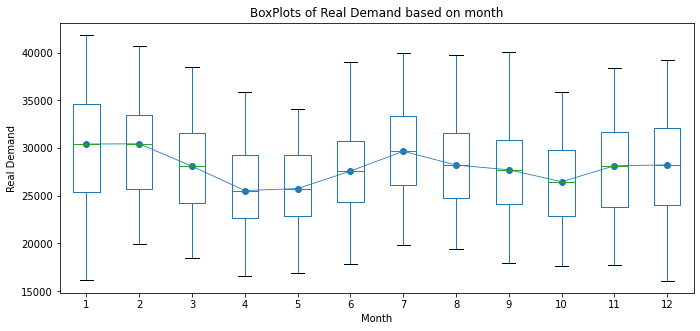

In [22]:
fig, ax = plt.subplots(figsize=(11, 5))
demanda['Mes'] = demanda['Datetime'].dt.month
demanda.boxplot(column='Demanda Real', by='Mes', ax=ax,)
demanda.groupby('Mes')['Demanda Real'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Real Demand')
ax.set_xlabel('Month')
ax.set_title('BoxPlots of Real Demand based on month')
fig.suptitle('');

Grafico de autocorrelacion

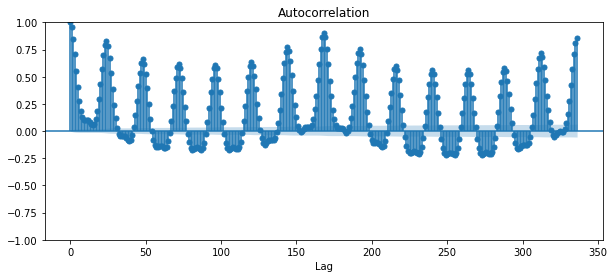

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(demanda['Demanda Real'], ax=ax, lags=24*14)
plt.xlabel('Lag')
plt.show()

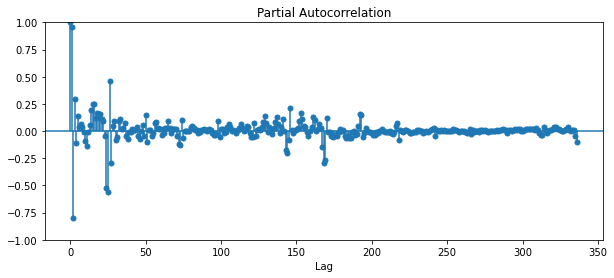

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_pacf(demanda['Demanda Real'], ax=ax, lags=24*14)
plt.xlabel('Lag')
plt.show()

## Holidays relevance

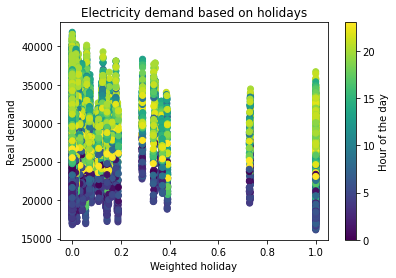

In [25]:
auxfest = [24*[i] for i in festivos['sumafest']]
fest = [x for xs in auxfest for x in xs]
fest

# Define colormap
colormap = plt.cm.viridis

# Normalize the color range
normalize = plt.Normalize(vmin=min(list(demanda['Datetime'].dt.hour)), vmax=max(list(demanda['Datetime'].dt.hour)))

# Create the scatter plot
plt.scatter(fest, demanda['Demanda Real'], c=list(demanda['Datetime'].dt.hour), cmap=colormap, norm=normalize)

# Add a colorbar
plt.colorbar(label='Hour of the day')

# Add labels and title
plt.xlabel('Weighted holiday')
plt.ylabel('Real demand')
plt.title('Electricity demand based on holidays')

# Display the plot
plt.show()

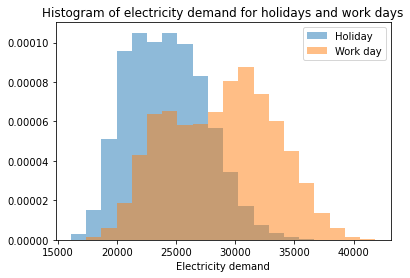

In [26]:
aux = np.array (demanda['Demanda Real'])
auxfest1 = aux[np.array(fest)==1.0]
auxfest0 = aux[np.array(fest)==0.0]
plt.hist (auxfest1, bins = 20, density = True, alpha=0.5, range = (min(min(auxfest1), min(auxfest0)), max(max(auxfest1), max(auxfest0))), label = 'Holiday')
plt.hist (auxfest0, bins = 20, density = True, alpha=0.5, range = (min(min(auxfest1), min(auxfest0)), max(max(auxfest1), max(auxfest0))), label='Work day')
plt.legend()
plt.title('Histogram of electricity demand for holidays and work days')
plt.xlabel('Electricity demand')
plt.show()

## Scatter plots

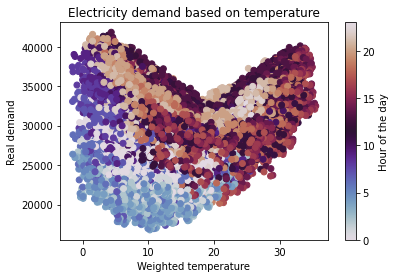

In [45]:
auxfest = [24*[i] for i in festivos['sumafest']]
fest = np.array([x for xs in auxfest for x in xs])
fest

temp = demanda['temperature_2m_0'].values
dem = demanda['Demanda Real'].values
date = demanda['Datetime'].dt.hour.values

fest_filter = fest == 0

temp = temp[fest_filter]
dem = dem[fest_filter]
date = date[fest_filter]

# Define colormap
colormap = plt.cm.twilight

# Normalize the color range
normalize = plt.Normalize(vmin=min(date), vmax=max(date))

# Create the scatter plot
plt.scatter(temp, dem, c=list(date), cmap=colormap, norm=normalize)

# Add a colorbar
plt.colorbar(label='Hour of the day')

# Add labels and title
plt.xlabel('Weighted temperature')
plt.ylabel('Real demand')
plt.title('Electricity demand based on temperature')

# Display the plot
plt.show()

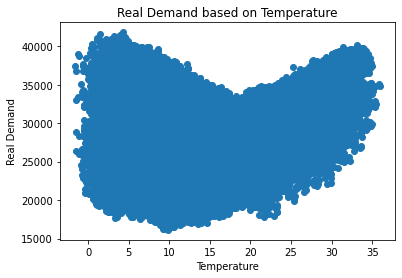

In [28]:
auxfest = [24*[i] for i in festivos['sumafest']]
fest = [x for xs in auxfest for x in xs]
fest

plt.scatter(demanda['temperature_2m_0'], demanda['Demanda Real'])
plt.title ('Real Demand based on Temperature')
plt.xlabel ('Temperature')
plt.ylabel ('Real Demand')
plt.show()

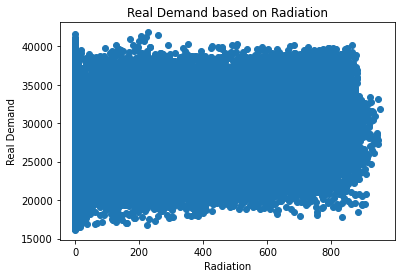

In [29]:
plt.scatter(demanda['direct_normal_irradiance_instant_0'], demanda['Demanda Real'])
plt.title ('Real Demand based on Radiation')
plt.xlabel ('Radiation')
plt.ylabel ('Real Demand')
plt.show()

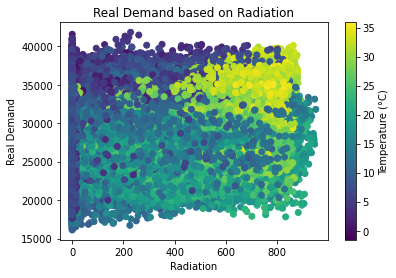

In [30]:
# Create the scatter plot with colormap
scatter = plt.scatter(demanda['direct_normal_irradiance_instant_0'], 
                      demanda['Demanda Real'], 
                      c=demanda['temperature_2m_0'],  # Set color based on temperature
                      cmap='viridis')  # Choose a colormap, e.g., 'viridis', 'plasma', 'inferno', 'magma'

# Adding a title and labels
plt.title('Real Demand based on Radiation')
plt.xlabel('Radiation')
plt.ylabel('Real Demand')

# Add a colorbar to the plot
plt.colorbar(scatter, label='Temperature (°C)')

# Show the plot
plt.show()

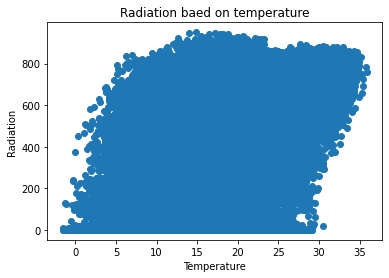

In [31]:
plt.scatter(demanda['temperature_2m_0'], demanda['direct_normal_irradiance_instant_0'])
plt.title ('Radiation baed on temperature')
plt.xlabel ('Temperature')
plt.ylabel ('Radiation')
plt.show()

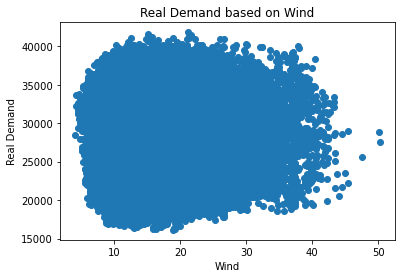

In [32]:
plt.scatter(demanda['wind_speed_100m_0'], demanda['Demanda Real'])
plt.title ('Real Demand based on Wind')
plt.xlabel ('Wind')
plt.ylabel ('Real Demand')
plt.show()

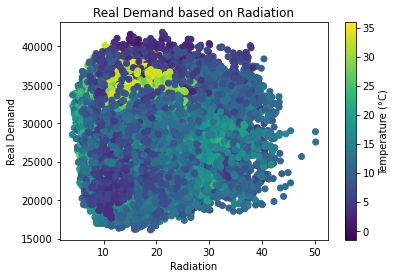

In [33]:
# Create the scatter plot with colormap
scatter = plt.scatter(demanda['wind_speed_100m_0'], 
                      demanda['Demanda Real'], 
                      c=demanda['temperature_2m_0'],  # Set color based on temperature
                      cmap='viridis')  # Choose a colormap, e.g., 'viridis', 'plasma', 'inferno', 'magma'

# Adding a title and labels
plt.title('Real Demand based on Radiation')
plt.xlabel('Radiation')
plt.ylabel('Real Demand')

# Add a colorbar to the plot
plt.colorbar(scatter, label='Temperature (°C)')

# Show the plot
plt.show()

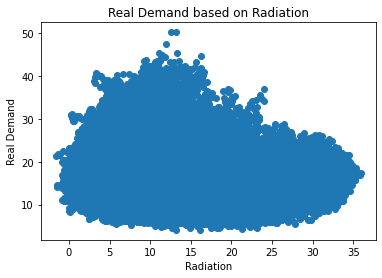

In [34]:
plt.scatter(demanda['temperature_2m_0'], demanda['wind_speed_100m_0'])
plt.title ('Real Demand based on Radiation')
plt.xlabel ('Radiation')
plt.ylabel ('Real Demand')
plt.show()

In [35]:
demanda_2023 = demanda.loc[demanda['Datetime'].dt.year == 2023]

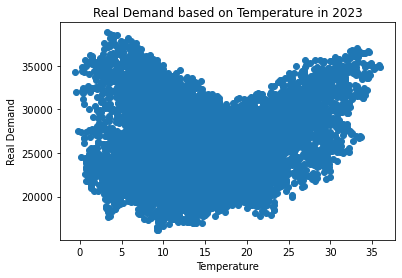

In [36]:
plt.scatter(demanda_2023['temperature_2m_0'], demanda_2023['Demanda Real'])
plt.title ('Real Demand based on Temperature in 2023')
plt.xlabel ('Temperature')
plt.ylabel ('Real Demand')
plt.show()

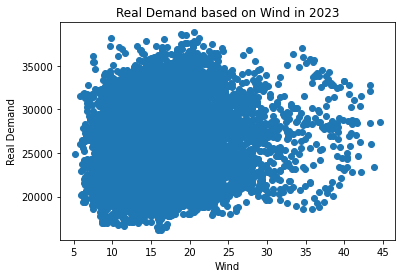

In [37]:
plt.scatter(demanda_2023['wind_speed_100m_0'], demanda_2023['Demanda Real'])
plt.title ('Real Demand based on Wind in 2023')
plt.xlabel ('Wind')
plt.ylabel ('Real Demand')
plt.show()

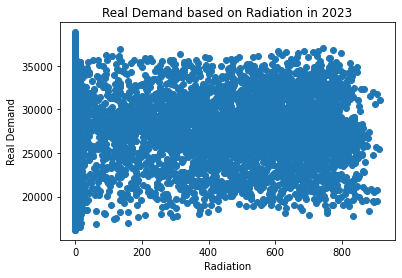

In [38]:
plt.scatter(demanda_2023['direct_normal_irradiance_instant_0'], demanda_2023['Demanda Real'])
plt.title ('Real Demand based on Radiation in 2023')
plt.xlabel ('Radiation')
plt.ylabel ('Real Demand')
plt.show()

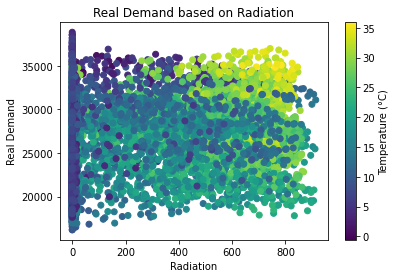

In [39]:
# Create the scatter plot with colormap
scatter = plt.scatter(demanda_2023['direct_normal_irradiance_instant_0'], 
                      demanda_2023['Demanda Real'], 
                      c=demanda_2023['temperature_2m_0'],  # Set color based on temperature
                      cmap='viridis')  # Choose a colormap, e.g., 'viridis', 'plasma', 'inferno', 'magma'

# Adding a title and labels
plt.title('Real Demand based on Radiation')
plt.xlabel('Radiation')
plt.ylabel('Real Demand')

# Add a colorbar to the plot
plt.colorbar(scatter, label='Temperature (°C)')

# Show the plot
plt.show()